In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.decomposition import PCA

In [2]:
image_resolution = 384

# Loading the Data

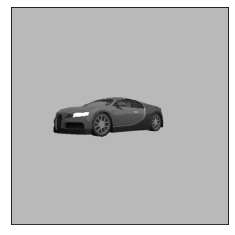

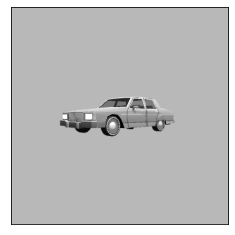

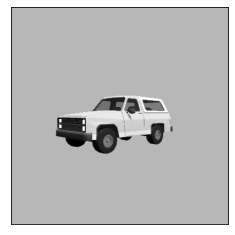

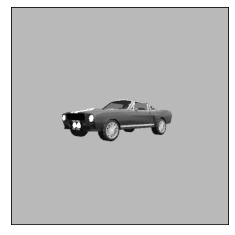

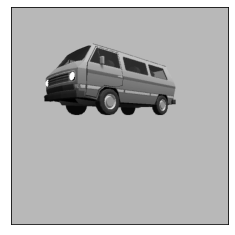

In [3]:
# Example of loading an image for each car
image_path = "Car1Rotations\car1_{}_{}.png".format(image_resolution, 45)
image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
input_arr =tf. keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
plt.imshow(input_arr, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

image_path = "Car2Rotations\car2_{}_{}.png".format(image_resolution, 45)
image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
input_arr =tf. keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
plt.imshow(input_arr, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

image_path = "Car3Rotations\car3_{}_{}.png".format(image_resolution, 45)
image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
input_arr =tf. keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
plt.imshow(input_arr, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

image_path = "Car4Rotations\car4_{}_{}.png".format(image_resolution, 45)
image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
input_arr =tf. keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
plt.imshow(input_arr, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

image_path = "Car5Rotations\car5_{}_{}.png".format(image_resolution, 45)
image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
input_arr =tf. keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
plt.imshow(input_arr, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

# Car 1

In [3]:
car1_images = []
for i in range(360):
    image_path = "Car1Rotations\car1_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    car1_images.append(input_arr)
car1_images = np.array(car1_images)

### An example of subtracting images

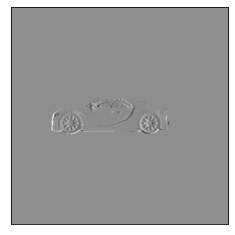

In [4]:
plt.imshow(car1_images[90] - car1_images[85], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

### PCA

(360, 2)


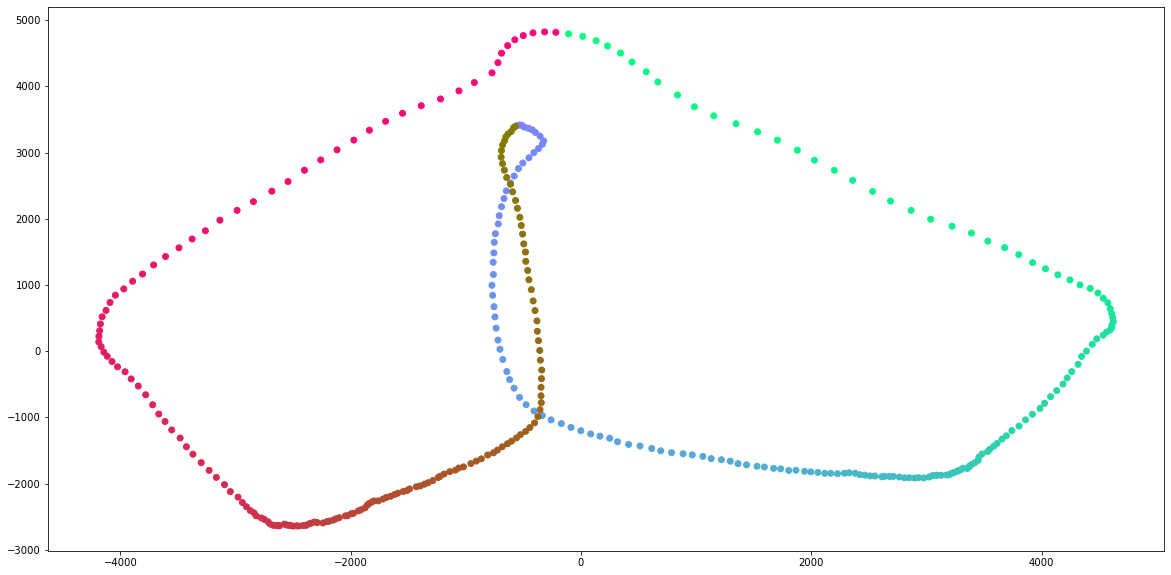

In [14]:
pca = PCA(2)
reduced = pca.fit_transform(car1_images.reshape((360, 384*384)))
print(reduced.shape)

plt.figure(figsize=(20,10))
x_values = reduced[:,0]
y_values = reduced[:,1]
#number2color = ['red', 'orange', 'olive', 'green', 'cyan', 'blue','purple','pink','brown','gray']
#colors = [number2color[n] for n in databunch.target]
#colors = ['red']*36 + ['orange']*36 + ['olive']*36 + ['green']*36 + ['cyan']*36 + ['blue']*36 + ['purple']*36 + ['pink']*36 + ['brown']*36 + ['gray']*36
colors = [(i/float(360), (360-i)/float(360),((i + 180) % 360) / float(360)) for i in range(360)]
plt.scatter(x_values, y_values, c=colors)

#legend_elements = [Line2D([0], [0], marker='o', color='w', lw=4, label=str(i), markerfacecolor=number2color[i], markersize=15) for i in range(10)]
#plt.legend(handles=legend_elements, fontsize=14)

## Creating Image Differences

In [4]:
# How many random pairs of images we will subtract
num_differences = 4000

# Keep track of which pairs have been seen
seen_differences = set()

data1 = []
target1 = []

np.random.seed(5)
for _ in range(num_differences):
    index1 = np.random.randint(0, 360)
    index2 = np.random.randint(0, 360)
    
    # Ignore duplicates
    while (index1, index2) in seen_differences:
        index1 = np.random.randint(0, 360)
        index2 = np.random.randint(0, 360)

    seen_differences.add( (index1, index2) )
    data1.append(car1_images[index2] - car1_images[index1])
    degree_difference = index2 - index1
    target1.append(degree_difference)
    
data1 = np.array(data1)
target1 = np.array(target1)
print(data1.shape)
print(target1.shape)

(4000, 384, 384)
(4000,)


In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1, target1, test_size=0.125, random_state=10)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=float(1)/7, random_state=11)
print("X train: {}".format(X_train1.shape))
print("y train: {}".format(y_train1.shape))
print("X val: {}".format(X_val1.shape))
print("y val: {}".format(y_val1.shape))
print("X test: {}".format(X_test1.shape))
print("y test: {}".format(y_test1.shape))

X train: (3000, 384, 384)
y train: (3000,)
X val: (500, 384, 384)
y val: (500,)
X test: (500, 384, 384)
y test: (500,)


## The Model for Car 1

In [6]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(image_resolution, image_resolution)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation="linear")
])

In [7]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error')

In [8]:
history1 = model1.fit(X_train1, y_train1, epochs=30, validation_data=(X_val1,y_val1), batch_size=32)

Epoch 1/30
94/94 [==============================] - 23s 243ms/step - loss: 2021907.0000 - val_loss: 7478.0352
Epoch 2/30
94/94 [==============================] - 19s 203ms/step - loss: 6774.4834 - val_loss: 5153.9673
Epoch 3/30
94/94 [==============================] - 18s 189ms/step - loss: 5346.8672 - val_loss: 4775.3511
Epoch 4/30
94/94 [==============================] - 18s 192ms/step - loss: 4704.7817 - val_loss: 3767.3545
Epoch 5/30
94/94 [==============================] - 18s 195ms/step - loss: 4004.7209 - val_loss: 3557.3545
Epoch 6/30
94/94 [==============================] - 18s 196ms/step - loss: 3533.6614 - val_loss: 2852.0503
Epoch 7/30
94/94 [==============================] - 18s 196ms/step - loss: 2917.4014 - val_loss: 2679.6765
Epoch 8/30
94/94 [==============================] - 18s 195ms/step - loss: 2351.1042 - val_loss: 1982.6216
Epoch 9/30
94/94 [==============================] - 19s 199ms/step - loss: 1817.8696 - val_loss: 1483.7776
Epoch 10/30
94/94 [===============

In [9]:
test_predictions1 = model1.predict(X_test1)

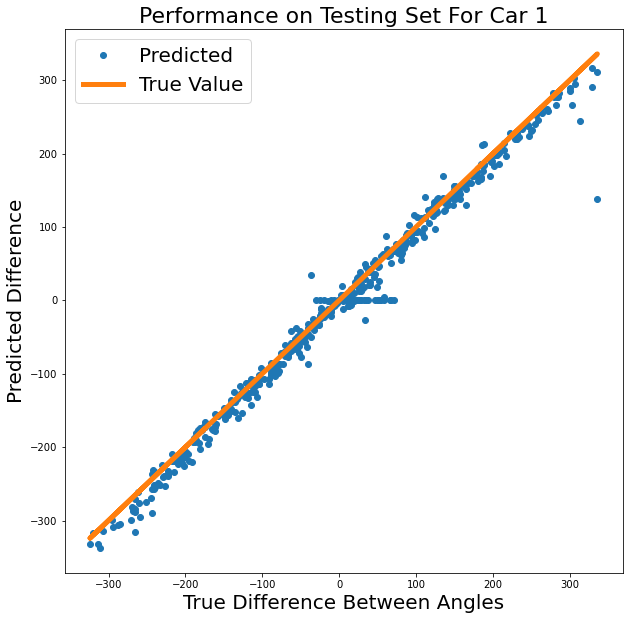

In [11]:
size = len(y_test1)
plt.figure(figsize=(10,10))
plt.plot(y_test1, list(test_predictions1), 'o', label='Predicted', ms=6)
plt.plot(y_test1, y_test1, label='True Value', lw=5)
plt.xlabel("True Difference Between Angles", fontsize=20)
plt.ylabel("Predicted Difference", fontsize=20)
plt.legend(fontsize=20)
plt.title("Performance on Testing Set For Car 1", fontsize=22)
plt.show()

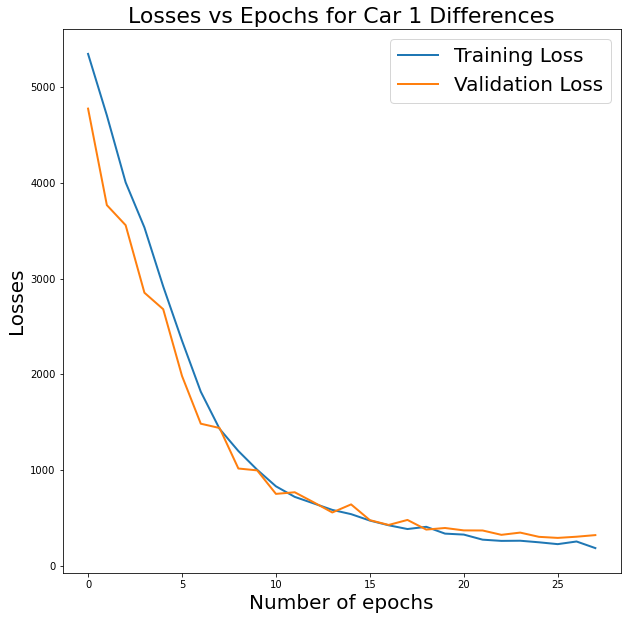

In [12]:
losses1 = history1.history['loss'][2:]
val_losses1 = history1.history['val_loss'][2:]

plt.figure(figsize=(10,10))
plt.plot(range(len(losses1)), losses1, lw=2, label="Training Loss")
plt.plot(range(len(losses1)), val_losses1, lw=2, label="Validation Loss")
plt.ylabel("Losses", fontsize=20)
plt.xlabel("Number of epochs", fontsize=20)
plt.title("Losses vs Epochs for Car 1 Differences", fontsize=22)
plt.legend(fontsize=20)
plt.show()

## Predicting the Absolute Angle

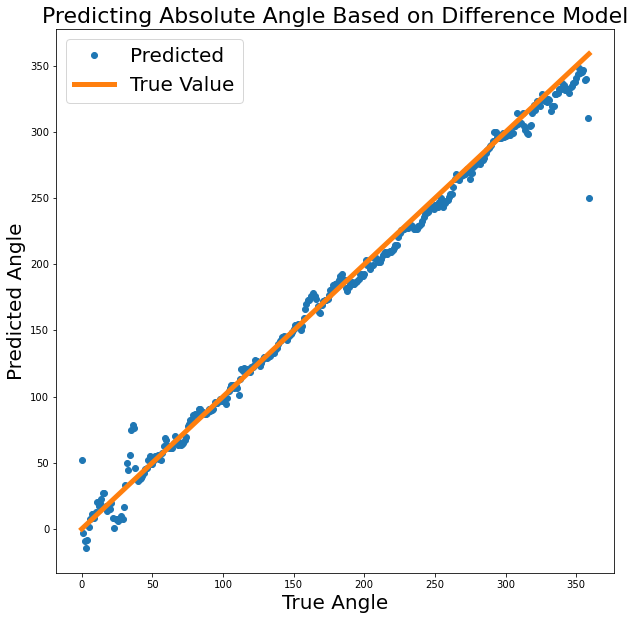

In [28]:
subtracted_by_0 = np.array([car1_images[i] - car1_images[90] for i in range(360)])
predicted = model1.predict(subtracted_by_0) + 90
size = len(predicted)
plt.figure(figsize=(10,10))
plt.plot(range(360), list(predicted), 'o', label='Predicted', ms=6)
plt.plot(range(360), range(360), label='True Value', lw=5)
plt.xlabel("True Angle", fontsize=20)
plt.ylabel("Predicted Angle", fontsize=20)
plt.legend(fontsize=20)
plt.title("Predicting Absolute Angle Based on Difference Model", fontsize=22)
plt.show()

# Car 2

In [29]:
car2_images = []
for i in range(360):
    image_path = "Car2Rotations\car2_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    car2_images.append(input_arr)
car2_images = np.array(car2_images)

### An example of subtracting images

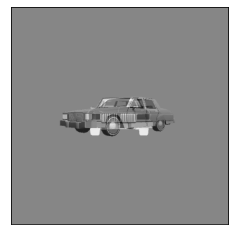

In [30]:
plt.imshow(car2_images[45] - car2_images[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

In [31]:
# How many random pairs of images we will subtract
num_differences = 400

# Keep track of which pairs have been seen
seen_differences = set()

data2 = []
target2 = []

np.random.seed(5)
for _ in range(num_differences):
    index1 = np.random.randint(0, 360)
    index2 = np.random.randint(0, 360)
    
    # Ignore duplicates
    while (index1, index2) in seen_differences:
        index1 = np.random.randint(0, 360)
        index2 = np.random.randint(0, 360)

    seen_differences.add( (index1, index2) )
    data2.append(car2_images[index2] - car2_images[index1])
    degree_difference = index2 - index1
    target2.append(degree_difference)
    
data2 = np.array(data2)
target2 = np.array(target2)
print(data2.shape)
print(target2.shape)

(400, 384, 384)
(400,)


## Testing on Car 2 with a Model Trained on Car 1

In [32]:
model1_predict_car2 = model1.predict(data2)

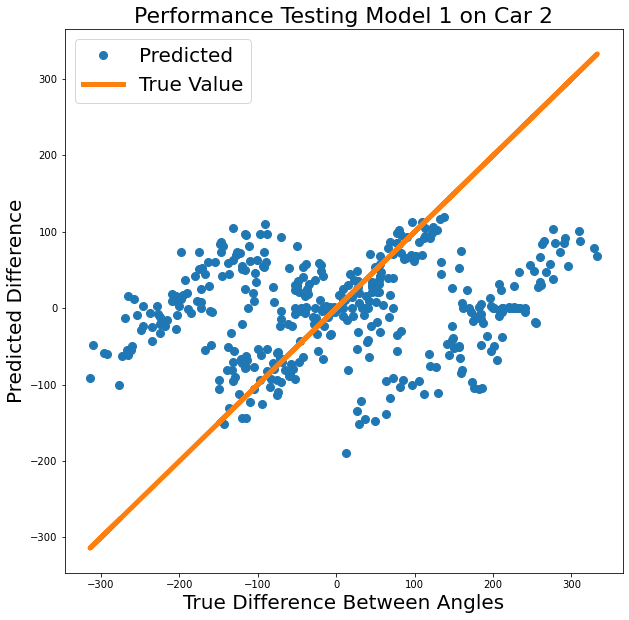

In [33]:
size = len(target2)
plt.figure(figsize=(10,10))
plt.plot(target2, list(model1_predict_car2), 'o', label='Predicted', ms=8)
plt.plot(target2, target2, label='True Value', lw=5)
plt.xlabel("True Difference Between Angles", fontsize=20)
plt.ylabel("Predicted Difference", fontsize=20)
plt.legend(fontsize=20)
plt.title("Performance Testing Model 1 on Car 2", fontsize=22)
plt.show()

(360, 2)


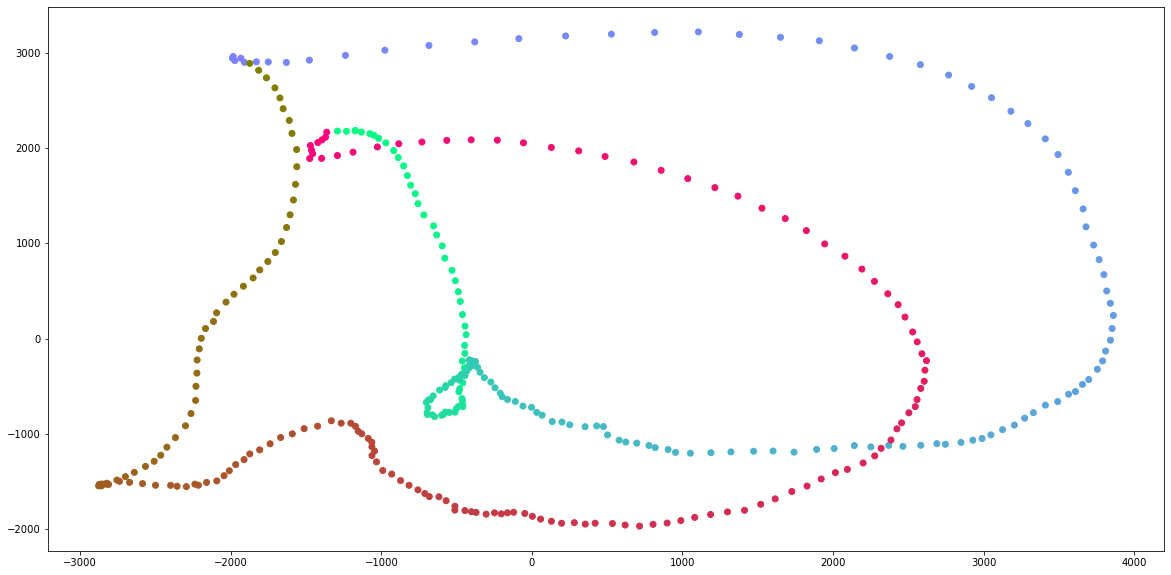

In [19]:
pca = PCA(2)
reduced = pca.fit_transform(car2_images.reshape((360, 384*384)))
print(reduced.shape)

plt.figure(figsize=(20,10))
x_values = reduced[:,0]
y_values = reduced[:,1]
#number2color = ['red', 'orange', 'olive', 'green', 'cyan', 'blue','purple','pink','brown','gray']
#colors = [number2color[n] for n in databunch.target]
#colors = ['red']*36 + ['orange']*36 + ['olive']*36 + ['green']*36 + ['cyan']*36 + ['blue']*36 + ['purple']*36 + ['pink']*36 + ['brown']*36 + ['gray']*36
colors = [(i/float(360), (360-i)/float(360),((i + 180) % 360) / float(360)) for i in range(360)]
plt.scatter(x_values, y_values, c=colors)

# Training on Car 1 Plain Images, Not Differences

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from collections import Counter
image_resolution = 384

In [2]:
car1_images = []
for i in range(360):
    image_path = "Car1Rotations\car1_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    car1_images.append(input_arr)
car1_images = np.array(car1_images)

In [34]:
target = np.array([float(i) for i in range(360)])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(car1_images, target, test_size=float(1)/9, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=11)
print("X train: {}".format(X_train.shape))
print("y train: {}".format(y_train.shape))
print("X val: {}".format(X_val.shape))
print("y val: {}".format(y_val.shape))
print("X test: {}".format(X_test.shape))
print("y test: {}".format(y_test.shape))

X train: (280, 384, 384)
y train: (280,)
X val: (40, 384, 384)
y val: (40,)
X test: (40, 384, 384)
y test: (40,)


In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(image_resolution, image_resolution)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation="linear")
])

In [66]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 147456)            0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               75497984  
_________________________________________________________________
dense_51 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_52 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 5         
Total params: 75,531,929
Trainable params: 75,531,929
Non-trainable params: 0
_________________________________________

In [43]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.00001,
    decay_steps=50,
    decay_rate=0.95)
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=adam_optimizer,
              loss='mean_squared_error')

In [44]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_test,y_test), batch_size=8)

Epoch 1/40
35/35 [==============================] - 13s 377ms/step - loss: 24833.8535 - val_loss: 10414.9609
Epoch 2/40
35/35 [==============================] - 13s 366ms/step - loss: 9266.1758 - val_loss: 8265.1318
Epoch 3/40
35/35 [==============================] - 12s 355ms/step - loss: 7658.3101 - val_loss: 5220.3364
Epoch 4/40
35/35 [==============================] - 13s 366ms/step - loss: 5698.1851 - val_loss: 3858.6687
Epoch 5/40
35/35 [==============================] - 12s 329ms/step - loss: 5254.4512 - val_loss: 4006.6665
Epoch 6/40
35/35 [==============================] - 11s 305ms/step - loss: 3326.3030 - val_loss: 3632.3608
Epoch 7/40
35/35 [==============================] - 11s 314ms/step - loss: 2915.0090 - val_loss: 3832.1321
Epoch 8/40
35/35 [==============================] - 12s 337ms/step - loss: 2669.7888 - val_loss: 2852.5415
Epoch 9/40
35/35 [==============================] - 12s 351ms/step - loss: 2796.2957 - val_loss: 2054.7192
Epoch 10/40
35/35 [================

In [45]:
test_predictions = model.predict(X_test)

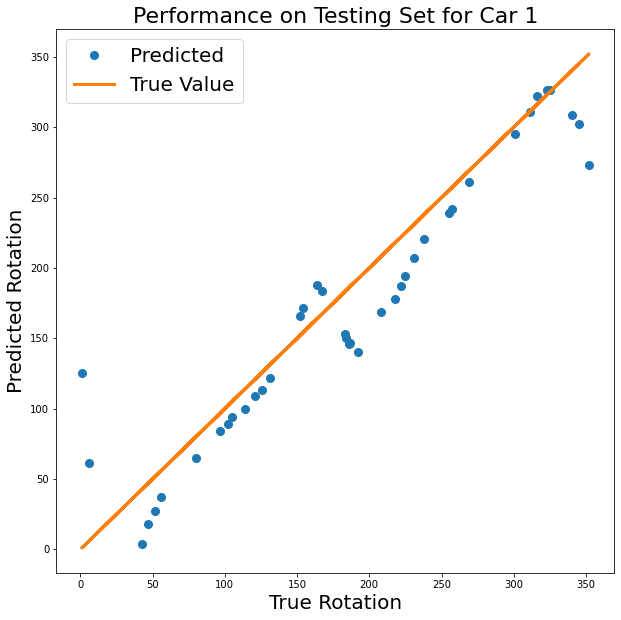

In [47]:
size = len(y_test)
plt.figure(figsize=(10,10))
plt.plot(y_test, list(test_predictions), 'o', label='Predicted', ms=8)
plt.plot(y_test, y_test, label='True Value', lw=3)
plt.xlabel("True Rotation", fontsize=20)
plt.ylabel("Predicted Rotation", fontsize=20)
plt.legend(fontsize=20)
plt.title("Performance on Testing Set for Car 1", fontsize=22)
plt.show()

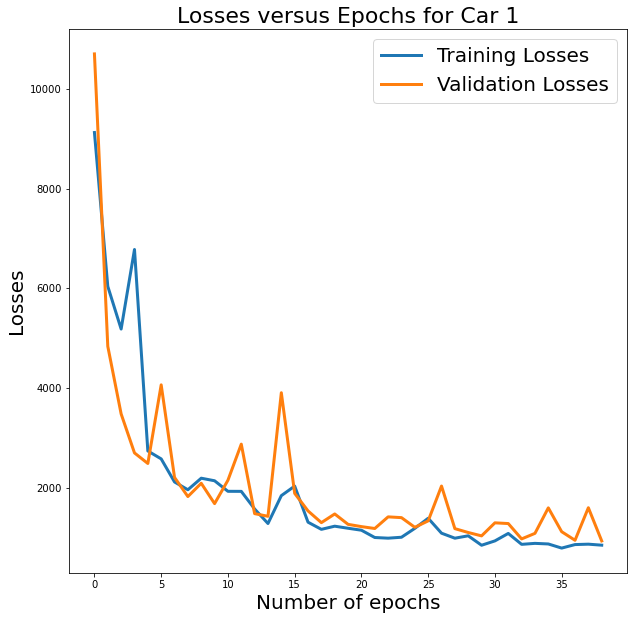

In [65]:
losses = history.history['loss'][1:]
val_losses = history.history['val_loss'][1:]

plt.figure(figsize=(10,10))
plt.plot(range(len(losses)), losses, lw=3, label='Training Losses')
plt.plot(range(len(losses)), val_losses, lw=3, label='Validation Losses')
plt.ylabel("Losses", fontsize=20)
plt.xlabel("Number of epochs", fontsize=20)
plt.legend(fontsize=20)
plt.title("Losses versus Epochs for Car 1", fontsize=22)
plt.show()

# Training with Images from All 4 Cars

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
image_resolution = 384

### Reading in the Images

In [3]:
data = []
target = []
for i in range(360):
    image_path = "Car1Rotations\car1_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    data.append(input_arr)
    target.append(i)

for i in range(360):
    image_path = "Car2Rotations\car2_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    data.append(input_arr)
    target.append(i)

for i in range(360):
    image_path = "Car3Rotations\car3_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    data.append(input_arr)
    target.append(i)

for i in range(360):
    image_path = "Car4Rotations\car4_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    data.append(input_arr)
    target.append(i)
    
data = np.array(data)
target = np.array(target)

In [4]:
print(data.shape)
print(target.shape)

(1440, 384, 384)
(1440,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=float(1)/12, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=float(1)/11, random_state=234)
print("X train: {}".format(X_train.shape))
print("y train: {}".format(y_train.shape))
print("X val: {}".format(X_val.shape))
print("y val: {}".format(y_val.shape))
print("X test: {}".format(X_test.shape))
print("y test: {}".format(y_test.shape))

X train: (1200, 384, 384)
y train: (1200,)
X val: (120, 384, 384)
y val: (120,)
X test: (120, 384, 384)
y test: (120,)


### Training

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(image_resolution, image_resolution)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation="linear")
])

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='mean_squared_error')

In [19]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test), batch_size=32)

Epoch 1/20
38/38 [==============================] - 18s 473ms/step - loss: 44893.6719 - val_loss: 42275.9922
Epoch 2/20
38/38 [==============================] - 16s 413ms/step - loss: 43351.6445 - val_loss: 42274.6367
Epoch 3/20
38/38 [==============================] - 14s 366ms/step - loss: 43350.3047 - val_loss: 42273.2930
Epoch 4/20
 6/38 [===>..........................] - ETA: 9s - loss: 47175.3438

KeyboardInterrupt: 

In [9]:
test_predictions = model.predict(X_test)

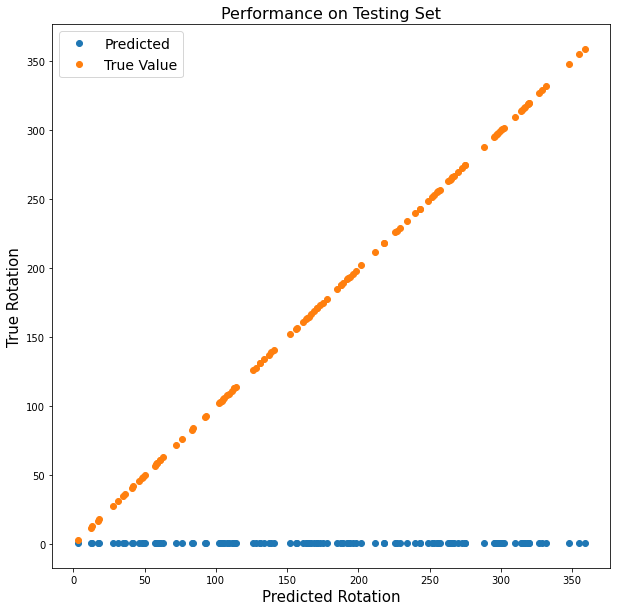

In [10]:
size = len(y_test)
plt.figure(figsize=(10,10))
plt.plot(y_test, list(test_predictions), 'o', label='Predicted', lw=3)
plt.plot(y_test, y_test, 'o', label='True Value', lw=3)
plt.ylabel("True Rotation", fontsize=15)
plt.xlabel("Predicted Rotation", fontsize=15)
plt.legend(fontsize=14)
plt.title("Performance on Testing Set", fontsize=16)
plt.show()